# Predict Loan Defaults [accuracy :: 0.8217]

## 1.Packages

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification



## 2 - Dataset 

In [2]:
df=pd.read_csv('/home/dion/Desktop/loan.csv')

df.describe



<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes 

## 3.Visualize the data:

Text(0,0.5,'Number of Defaults')

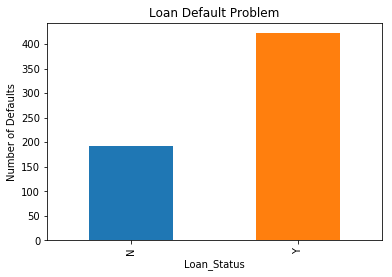

In [3]:
plt = df.Loan_Status.value_counts().sort_index().plot('bar',title='Loan Default Problem')
plt.set_xlabel('Loan_Status')
plt.set_ylabel('Number of Defaults')

## 4. Cleaning Data

#### 4.1 Check for NA



In [4]:
names = df.columns
for column in names:
    print(column + ' - ' + str(df[column].isnull().sum()))

Loan_ID - 0
Gender - 13
Married - 3
Dependents - 15
Education - 0
Self_Employed - 32
ApplicantIncome - 0
CoapplicantIncome - 0
LoanAmount - 22
Loan_Amount_Term - 14
Credit_History - 50
Property_Area - 0
Loan_Status - 0


#### 4.2 Encoding and filling NA

In [5]:
del df['Loan_ID']

df['Property_Area'] = df['Property_Area'].map({'Urban':0, 'Semiurban':1,'Rural':2})
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Married'] = df['Married'].map({'Yes':0, 'No':1})
df['Education'] = df['Education'].map({'Graduate':0, 'Not Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})
df['Dependents'] = df['Dependents'].map({'0':0, '1':1,'2':2,'3+':3})
df['Loan_Status'] = df['Loan_Status'].map({'Y':0, 'N':1})


In [6]:


mean1 = df.Gender.mean()
df.Gender= df.Gender.fillna(mean1)

mean2 = df.Married.mean()
df.Married= df.Married.fillna(mean2)

mean3 = df.Dependents.mean()
df.Dependents= df.Dependents.fillna(mean3)

mean4 = df.Self_Employed.mean()
df.Self_Employed= df.Self_Employed.fillna(mean4)

mean5 = df.LoanAmount.mean()
df.LoanAmount= df.LoanAmount.fillna(mean5)

mean6= df.Loan_Amount_Term.mean()
df.Loan_Amount_Term= df.Loan_Amount_Term.fillna(mean6)

mean7= df.Credit_History.mean()
df.Credit_History= df.Credit_History.fillna(mean7)



In [21]:
df.describe

<bound method NDFrame.describe of        Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0    0.000000      1.0    0.000000          0       0.000000             5849   
1    0.000000      0.0    1.000000          0       0.000000             4583   
2    0.000000      0.0    0.000000          0       1.000000             3000   
3    0.000000      0.0    0.000000          1       0.000000             2583   
4    0.000000      1.0    0.000000          0       0.000000             6000   
5    0.000000      0.0    2.000000          0       1.000000             5417   
6    0.000000      0.0    0.000000          1       0.000000             2333   
7    0.000000      0.0    3.000000          0       0.000000             3036   
8    0.000000      0.0    2.000000          0       0.000000             4006   
9    0.000000      0.0    1.000000          0       0.000000            12841   
10   0.000000      0.0    2.000000          0       0.000000             32

## 5. Dimensionality Reduction

### 5.1 Correlation between features

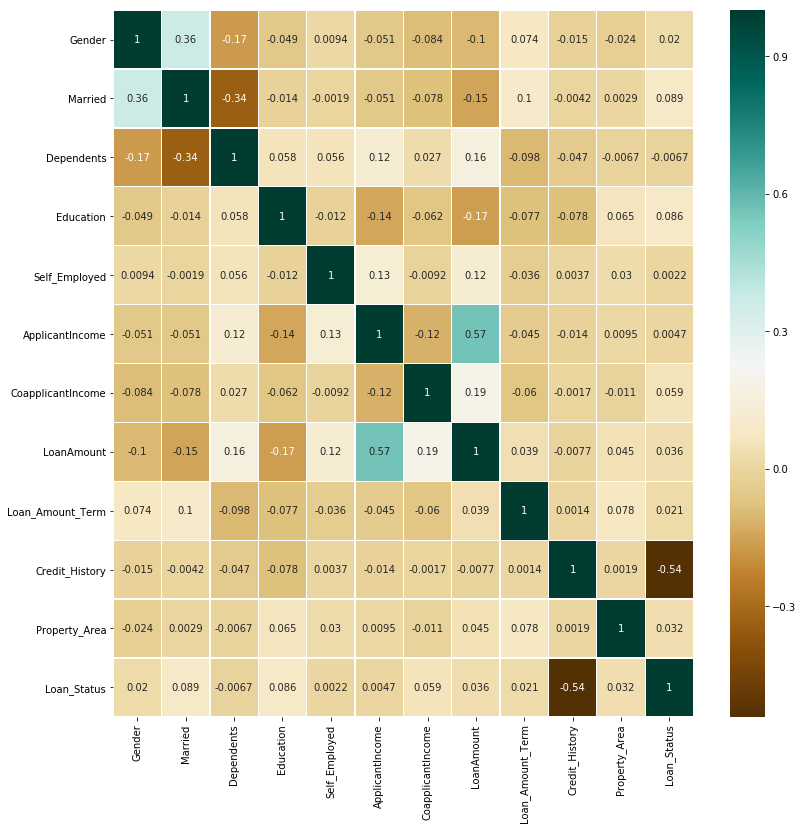

In [7]:
corr_matrix = df.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 13))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

## 6.Split Data

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Loan_Status',axis=1),df['Loan_Status'],test_size=0.25,random_state=42)

x_train.shape,x_test.shape


((460, 11), (154, 11))

## 7.Model Training-Predicted Values

In [9]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

pred=lg.predict(x_test)
accuracy_score(pred,y_test)

0.7792207792207793

## 8.Tunning Parameters

In [25]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
clf_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [26]:
clf_lr.best_score_ 

0.8217391304347826